## Field manipulation and I/O

In this section we will go over the basics of how to change the data inside a radar file and save a new radar file. We will do this by creating a new field that stores a reflectivity mask.

In [17]:
import pyart
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-06 14:50:34.870000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


As before, we will load our trusty radar file!

In [2]:
radar = pyart.io.read('../inf_tutorial_data/sgpxsaprcmacsurI5.c1.20170801.044013.nc')

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-06 14:42:09.494000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


Let's store the radar field into a variable.

In [3]:
ref_field = radar.fields['reflectivity']['data']

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-06 14:43:26.440000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


To create an array that is zero when the condition is false and one when it is true, we can make use of the np.ma.where command.

In [32]:
ref_gt_0 = np.ma.where(ref_field > 0, 1, 0)
print(ref_gt_0)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-06 15:17:48.538000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


To create a new field, we need to create a dictionary with keys containing the data, the long name, the units, the fill value, and the standard name.

In [33]:
mask_dict = {'data': ref_gt_0, 'units': '0 = Z < 0, 1 = Z >= 0', 'long_name': 'reflectivity_mask',
             '_FillValue': ref_gt_0.fill_value, 'standard_name': 'reflectivity_mask'}

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-06 15:17:49.969000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


Adding this field into the radar object is as simple as doing radar.add_field()!

In [34]:
radar.add_field('reflectivity_mask', mask_dict, replace_existing=True)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-06 15:17:51.143000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


We can now plot the field using RadarMapDisplayCartopy!

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-06 15:17:56.794000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


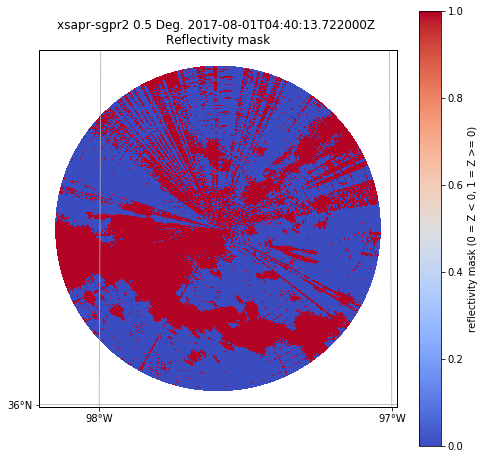

In [35]:
plt.figure(figsize=(8,8))
display = pyart.graph.RadarMapDisplayCartopy(radar)
display.plot_ppi_map('reflectivity_mask', cmap='coolwarm', vmin=0, vmax=1)

As you can see, we have now located all of the regions where the reflectivity is greater than 0 dBZ.

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-06 14:54:29.277000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


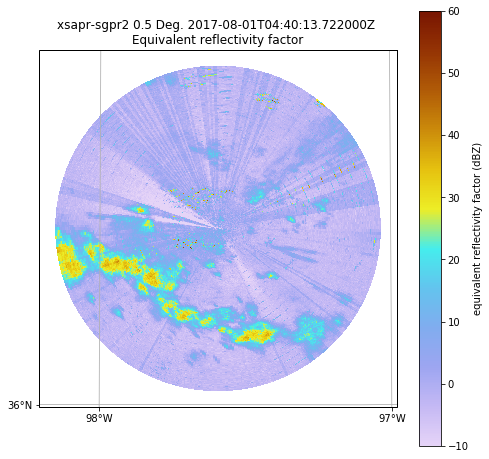

In [26]:
plt.figure(figsize=(8,8))
display.plot_ppi_map('reflectivity', cmap='pyart_LangRainbow12', vmin=-10, vmax=60)

Writing this radar object to a new file is as simple as uing pyart.io.write_cfradial()!

In [30]:
pyart.io.write_cfradial('new_radar.nc', radar)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-06 15:00:09.585000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


## Exercise

Create a field that is zero when the normalized coherent power is < 0.5 and is one when it is > 0.5

In [ ]:
%load section3_answer.py